# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Dataset

In [11]:
df = pd.read_excel("uybor.xlsx")

In [12]:
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [13]:
df.shape

(7421, 9)

In [17]:
df.info() # There are no NaN values in our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7421.0,2.619728,1.076887,1.000000,2.000000,3.000000,3.000000,10.000000
size,7421.0,73.150726,36.999670,14.000000,50.000000,65.000000,85.000000,456.000000
level,7421.0,3.699367,2.239028,1.000000,2.000000,3.000000,5.000000,19.000000
max_levels,7421.0,6.031397,2.607673,1.000000,4.000000,5.000000,9.000000,25.000000
price,7421.0,59117.618919,46701.090308,10500.000000,35000.000000,46500.000000,66847.000000,800000.000000
lat,7421.0,41.303620,0.033771,41.186375,41.281265,41.296388,41.324956,41.424522
lng,7421.0,69.256615,0.059061,69.148915,69.205802,69.260189,69.293713,69.588687


In [19]:
df.nunique()

address       1556
district        12
rooms            9
size           385
level           18
max_levels      22
price          695
lat            727
lng            693
dtype: int64

# 

In [27]:
df

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831
...,...,...,...,...,...,...,...,...,...
7416,"город Ташкент, Yashnobod район, Городок Авиаст...",Yashnobod,1,38.0,5,5,24500,41.292252,69.341907
7417,"город Ташкент, Yashnobod район, 1-й проезд Ави...",Yashnobod,2,49.0,1,4,32000,41.289606,69.343485
7418,"город Ташкент, Shayhontohur район, Зульфияханум",Shayhontohur,2,64.0,3,9,40000,41.331415,69.268901
7419,"город Ташкент, Mirzo Ulugbek район, Буюк Ипак ...",Mirzo Ulugbek,1,18.0,1,4,11000,41.310487,69.292223


# Vizualization
### rooms

In [ ]:
sns.swarmplot(x='rooms', y='price', data=df)
plt.show()

### level

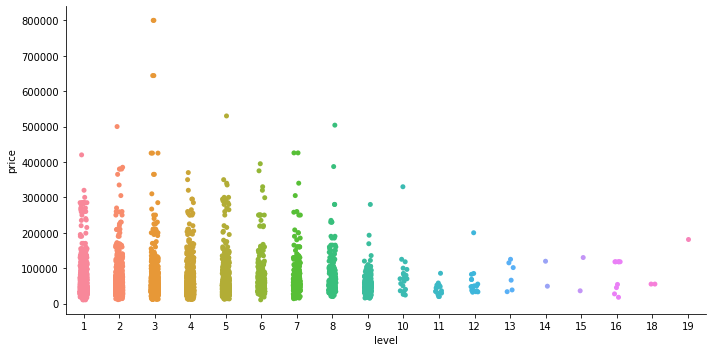

In [74]:
sns.catplot(x='level', y='price', data=df, height=5, aspect=2)

### max_levels

In [ ]:
print(df.max_levels.value_counts())

fig = plt.figure(figsize=(25, 20))

ax1 = fig.add_subplot(121)
sns.boxplot(x='max_levels', y='price', data=df, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='max_levels', y='price', data=df, ax=ax2)

In [79]:
mask_level = df.max_levels > 1
df[mask_level]

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831
...,...,...,...,...,...,...,...,...,...
7416,"город Ташкент, Yashnobod район, Городок Авиаст...",Yashnobod,1,38.0,5,5,24500,41.292252,69.341907
7417,"город Ташкент, Yashnobod район, 1-й проезд Ави...",Yashnobod,2,49.0,1,4,32000,41.289606,69.343485
7418,"город Ташкент, Shayhontohur район, Зульфияханум",Shayhontohur,2,64.0,3,9,40000,41.331415,69.268901
7419,"город Ташкент, Mirzo Ulugbek район, Буюк Ипак ...",Mirzo Ulugbek,1,18.0,1,4,11000,41.310487,69.292223


### This column gives us the ability to achieve results.

In [91]:
df.drop('district', axis=1, inplace=True)

In [92]:
df.head()

,rooms,size,level,max_levels,price,lat,lng
0,3,57.0,4,4,52000,41.371471,69.281049
1,2,52.0,4,5,56000,41.291115,69.261104
2,2,42.0,4,4,37000,41.280784,69.223683
3,3,65.0,1,4,49500,41.290163,69.196862
4,3,70.0,3,5,55000,41.300156,69.210831


## A visual representation of all columns.

In [ ]:
def print_histograms(dataset):
    fig, axis = plt.subplots(2, 4, figsize=(22,16))
    sns.distplot(df['price'], bins=80, ax=axis[0,0], color='blue', kde=False)
    axis[0,0].grid(True)
    sns.distplot(df['rooms'], bins=80, ax=axis[0,1], color='blue', kde=False)
    axis[0,1].grid(True)
    sns.distplot(df['size'], bins=80, ax=axis[0,2], color='blue', kde=False)
    axis[0,2].grid(True)
    sns.distplot(df['level'], bins=80, ax=axis[0,3], color='blue', kde=False)
    axis[0,3].grid(True)
    sns.distplot(df['max_levels'], bins=80, ax=axis[1,0], color='blue', kde=False)
    axis[1,0].grid(True)
    sns.distplot(df['lat'], bins=80, ax=axis[1,1], color='blue', kde=False)
    axis[1,1].grid(True)
    sns.distplot(df['lng'], bins=80, ax=axis[1,2], color='blue', kde=False)
    axis[1,2].grid(True)
    plt.show()

print_histograms(df)

# Looking for correlations
#### We can see that the price of the house has a strong correlation with the size of the house and the number of rooms.

price         1.000000
size          0.781830
rooms         0.552582
max_levels    0.219737
lng           0.070309
level         0.059276
lat           0.015636
Name: price, dtype: float64

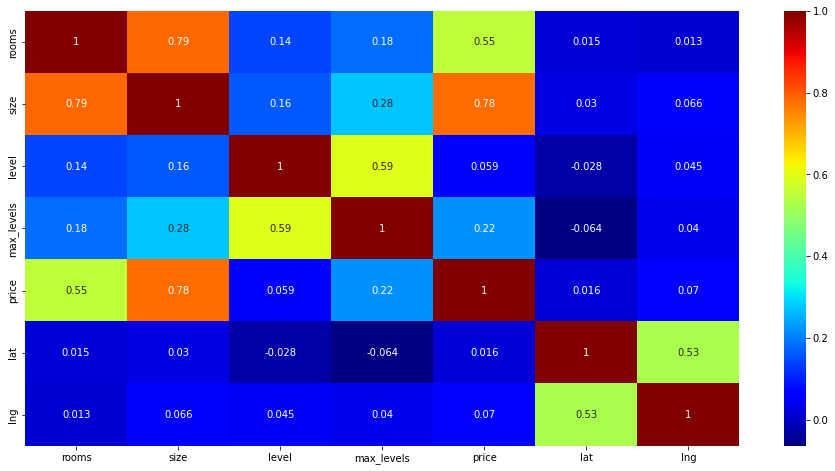

In [43]:
def compute_correlations_matrix(dataset):
  corr = df.corr(method = 'pearson')
  plt.figure(figsize=(16,8))
  sns.heatmap(corr, cmap="jet", annot=True)
  plt.yticks(rotation=90)
  return corr

correlations = compute_correlations_matrix(df)
correlations['price'].sort_values(ascending=False)

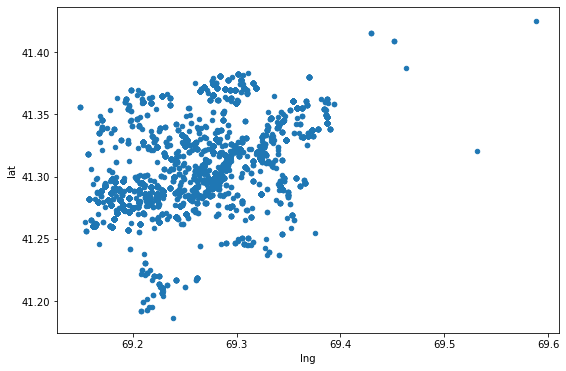

In [45]:
df.plot(kind='scatter', x='lng', y='lat', figsize=(9,6))
plt.show()

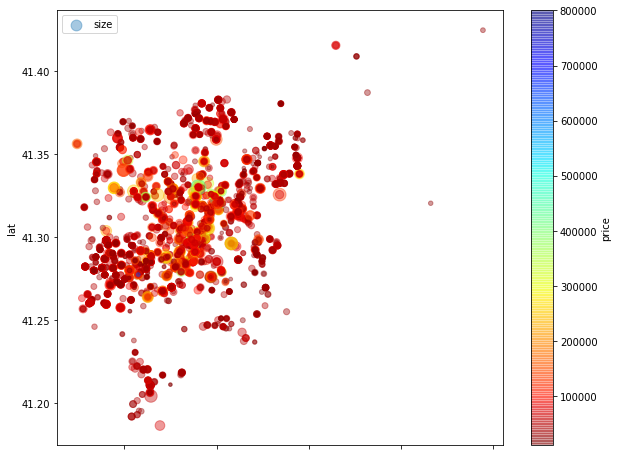

In [72]:
df.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    alpha=0.4,
    s=df['size']/2, # the point radius varies with the size of the house.
    label="size",
    c="price", # the dot color changes depending on the price of the house.
    cmap="jet_r", # color Blue - low income, red - high income.
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [60]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.781830
rooms         0.552582
max_levels    0.219737
lng           0.070309
level         0.059276
lat           0.015636
dtype: float64

In [ ]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(df[cols], height=5) # 2 ta juftliklar orasidagi korrelyatsiyani chizib beradi.
plt.show()

# Machine Learning.

In [93]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

In [ ]:
train_set

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])

In [98]:
X_prepared = pipeline.fit_transform(X_train)

In [99]:
X_prepared[0:5,:]

array([[-0.57525719, -0.7022135 , -1.2075125 , -0.7839191 , -0.94411787,
        -1.01938429],
       [ 0.3574734 , -0.0373173 , -0.31925496, -0.7839191 , -0.81126118,
         0.62672395],
       [-1.50798778, -0.91498028, -1.2075125 , -0.40433318, -0.99298808,
        -0.08950555],
       [ 0.3574734 ,  0.84034569, -1.2075125 , -0.02474726,  1.95438849,
         0.62639843],
       [ 2.22293458,  3.44673879,  1.90138888,  0.73442458,  0.29388339,
         1.13037861]])

In [100]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [101]:
LR_model.fit(X_prepared, y)

LinearRegression()

# Model evaluation

In [ ]:
test_set

In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

In [ ]:
y_test = test_set['price'].copy()
y_test

In [107]:
X_test_prepared = pipeline.transform(X_test)

In [108]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
y_predicted

In [ ]:
pd.DataFrame({'Prognoz':y_predicted, 'Real baxosi': y_test})

In [132]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predicted)
# MAE hisoblaymiz
print("MAE=", mae)

MAE= 490.81931756234786


In [133]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print("RMSE=", lin_rmse)

RMSE= 2202.897537032966


### DecisionTree

In [129]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [130]:
y_predicted = Tree_model.predict(X_test_prepared)


In [131]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2202.897537032966


### RandomForest

In [118]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [119]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

19832.426649244288


# Model evaluation
### Cross-Validation usuli bilan baholash

In [122]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = pipeline.transform(X)

In [123]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())


In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [126]:
display_scores(LR_rmse_scores)

Scores: [21837.68642305 18217.06306479 32600.49601717 27767.49360044
 32180.95503424 30026.0662389  39045.82552523 25561.4495401
 23774.27357752 28714.60011569]
Mean: 27972.59091371402
Std.dev: 5681.5544559014825


# Model evaluation
### DecisionTree

In [127]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [21127.6779977  20311.09339769 36037.76227167 30830.18438696
 27291.56907349 28896.8557644  32272.42994134 29168.42622728
 26747.49906424 18523.19042436]
Mean: 27120.668854912743
Std.dev: 5324.802421069413


# Model evaluation
### Randon Forest

In [128]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [15083.64298445 16888.01299147 25604.0548273  23179.34893247
 24889.67699518 23262.12241933 27489.59835775 22564.03158367
 21366.1800104  15162.36596862]
Mean: 21548.903507063893
Std.dev: 4169.719115314527
